In [2]:
import numpy as np
import pandas as pd

In [3]:
input_pre = '../csv_files/input_files/'
output_pre = '../csv_files/output_files/' 
main = pd.read_csv(output_pre + 'promote_database.csv')
print(main.shape)

(2400, 466)


C:\Users\ridhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (33,119,121,182,184,223,226,230,231,233,236,237,241,245,263,264,278,298,299,302,394,436,438,439,441,452,453,455,456) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
#list(main)

In [179]:
main['basic_information_complete'].count()

1950

In [180]:
long = pd.read_csv(input_pre + 'longitudinal.csv')

C:\Users\ridhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (21,24,25,31,32,75,195,197,199,209,215,217,219,239,244,247,250,256,262,271,274,277,280,344,369,460,461,465,468,469,470,593,595,598,604,610,619,625,628,631,634,641,645,649,653,697,711,713,782,784,796,876,877,882,921,933,937,1093,1097,1099,1101) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [181]:
len(long[long['sex_pq']==2])

27

In [286]:
list(long)

['id_participant_l',
 'redcap_event_name',
 'redcap_survey_identifier',
 'name_first',
 'name_middle',
 'name_last',
 'dob',
 'doe',
 'id_primary',
 'id_secondary',
 'id_imsms',
 'id_med_record_number',
 'subject_group',
 'email',
 'additional_notes',
 'basic_information_complete',
 'primary_questionnaire_timestamp',
 'dob_pq',
 'age_pq',
 'sex_pq',
 'race',
 'race_other',
 'ethnicity',
 'country_birth',
 'country_birth_other',
 'place_birth',
 'state_birth',
 'address_birth',
 'city_birth',
 'zipcode_birth',
 'country_15',
 'country_15_other',
 'place_15',
 'state_15',
 'address_15',
 'city_15',
 'zipcode_15',
 'state_now',
 'street_now',
 'city_now',
 'zipcode_now',
 'duration_place_current',
 'ht_now_ft',
 'ht_now_inch',
 'wt_now_lbs',
 'ht_18_ft',
 'ht_18_inch',
 'wt_18_lbs',
 'dx_ms',
 'dx_ms_age',
 'ms1sx_age',
 'dx_neuro_list',
 'dx_neuro___1',
 'dx_neuro___2',
 'dx_neuro___3',
 'dx_neuro___4',
 'dx_neuro___5',
 'dx_neuro___6',
 'dx_neuro___7',
 'dx_neuro___8',
 'dx_neuro___9',


In [182]:
long.shape

(1102, 1592)

In [183]:
#long.isna().sum()

In [184]:
long_columns = list(long)
main_columns = list(main)

In [185]:
long_complete = [x for x in long_columns if 'complete' in x]

In [186]:
long_complete

['basic_information_complete',
 'primary_questionnaire_complete',
 'promote_self_reported_outcomes_complete',
 'update_questionnaire_complete',
 'food_frequency_complete',
 'promis_bank_v12_physical_function_complete']

In [187]:
main_complete = [x for x in main_columns if 'complete' in x]

In [188]:
#main_complete

In [189]:
set(main_complete) & set(long_complete)

{'basic_information_complete', 'primary_questionnaire_complete'}

In [190]:
long['basic_information_complete'].count()

835

In [191]:
main['basic_information_complete'].count()

1950

In [192]:
main['self_reported_outcome_questionnaire_complete'].count()

1950

In [193]:
long['promote_self_reported_outcomes_complete'].count()

762

In [194]:
long['primary_questionnaire_complete'].count()

762

In [195]:
main['primary_questionnaire_complete'].count()

1950

In [196]:
participant_long = set(long['id_participant_l'])
#participant_long

In [197]:
participant_main = set(main['id_participant'])
#participant_main

In [198]:
only_main = participant_main - participant_long

In [199]:
only_long = participant_long - participant_main

In [200]:
main_self = set(main.loc[main['self_reported_outcome_questionnaire_complete'].isnull() == False, 'id_participant'])

In [201]:
long_self = set(long.loc[long['promote_self_reported_outcomes_complete'].isnull() == False, 'id_participant_l'])

In [202]:
# participants only in main database who have filled self reported and not present in longitudinal
l1 = list(main_self-long_self)
f1 = main.loc[main['id_participant'].isin(l1), ['id_participant','name_first','name_middle','name_last','dob']]
#main[main['id_participant'] ]
#f1.to_csv("self_main.csv")

In [203]:
# participants only in longitudinal database who have filled self reported and not present in main
l2 = list(long_self-main_self)
f2 = long.loc[long['id_participant_l'].isin(l2), ['id_participant_l','name_first','name_middle','name_last','dob']]
#main[main['id_participant'] ]
#f2.to_csv("self_long.csv")

In [204]:
main_primary = set(main.loc[main['primary_questionnaire_complete'].isnull() == False, 'id_participant'])

In [205]:
long_primary = set(long.loc[long['primary_questionnaire_complete'].isnull() == False, 'id_participant_l'])

In [206]:
# participants only in main database who have filled primary and not present in longitudinal
l3 = list(main_primary-long_primary)
f3 = main.loc[main['id_participant'].isin(l3), ['id_participant','name_first','name_middle','name_last','dob']]
#main[main['id_participant'] ]
#f3.to_csv("primary_main.csv")

In [207]:
# participants only in longitudinal database who have filled primary and not present in main
l4 = list(long_primary - main_primary)
f4 = long.loc[long['id_participant_l'].isin(l4), ['id_participant_l','name_first','name_middle','name_last','dob']]
#main[main['id_participant'] ]
#f4.to_csv("primary_long.csv")

In [208]:
long_complete

['basic_information_complete',
 'primary_questionnaire_complete',
 'promote_self_reported_outcomes_complete',
 'update_questionnaire_complete',
 'food_frequency_complete',
 'promis_bank_v12_physical_function_complete']

In [209]:
long['basic_information_complete'].isnull().sum()

267

In [210]:
long['primary_questionnaire_complete'].isnull().sum()

340

In [211]:
long['promote_self_reported_outcomes_complete'].isnull().sum()

340

In [212]:
long['update_questionnaire_complete'].isnull().sum()

762

In [213]:
long.loc[long['food_frequency_complete'] == 0, 'id_participant_l'].count()

895

In [214]:
long.loc[long['update_questionnaire_complete'] == 0, 'id_participant_l'].count()

113

In [215]:
long.loc[long['promote_self_reported_outcomes_complete'] == 0, 'id_participant_l'].count()

724

In [216]:
long.loc[long['primary_questionnaire_complete'] == 0, 'id_participant_l'].count()

679

In [217]:
long.loc[long['basic_information_complete'] == 0, 'id_participant_l'].count()

23

In [218]:
p_start = long.columns.get_loc("primary_questionnaire_timestamp")
print(p_start)
p_end = long.columns.get_loc("primary_questionnaire_complete") +1
print(p_end)
s_start = long.columns.get_loc("promote_self_reported_outcomes_timestamp")
print(s_start)
s_end = long.columns.get_loc("promote_self_reported_outcomes_complete")+1
print(s_end)

16
169
169
460


In [219]:
id_series = list(long['id_participant_l'])
#list(id_series)

In [220]:
primary_df = long.iloc[:,p_start:p_end]
#primary_df.shape
primary_df['id_participant'] = id_series
primary_df.shape

(1102, 154)

In [221]:
self_df = long.iloc[:,s_start:s_end]
#primary_df.head()
self_df['id_participant'] = id_series


In [222]:

self_df.shape
#self_df['id_participant']

(1102, 292)

In [223]:
#list(self_df)
self_df.id_participant.isnull().sum()

0

In [224]:
#self_df[self_df.isnull()== False].count()
#list(self_df)

In [225]:
self2 = self_df[self_df.isnull()]

In [226]:
len(self_df[self_df.promote_self_reported_outcomes_complete.isnull()])

340

In [227]:
len(self_df[self_df['promote_self_reported_outcomes_complete']==2])

38

In [285]:
#list(self_df)

In [229]:
# if dmt now == 1 check below
dmt_now_1 = self_df[self_df['dmt_now'] == 1]

In [230]:
dmt_now_0 = self_df[self_df['dmt_now'] == 0]

In [231]:
dmt_now_2 = self_df[self_df['dmt_now'] == 2]

In [232]:
#self_df[self_df['dmt_now']==2]
dmt_ref = {
    "dmtlist_now___1":"aubagio",
    "dmtlist_now___2":"avonex",
    "dmtlist_now___3":"betaseron",
    "dmtlist_now___4":"copaxone",
    "dmtlist_now___5":"extavia",
    "dmtlist_now___6":"gilenya",
    "dmtlist_now___7":"novantrone",
    "dmtlist_now___8":"plegridy",
    "dmtlist_now___9":"rebif",
    "dmtlist_now___10":"tecfidera",
    "dmtlist_now___11":"tysabri",
    "dmtlist_now___12":"other",
    "dmtlist_now___13":"rituxan",
    "dmtlist_now___14":"zinbryta",
    "dmtlist_now___15":"ocrevus",
    "dmtlist_now___16":"lemtrada",
}

In [233]:
import math
long.loc[long['dmt_now_tecfidera_duration'].isnull() == False, 'id_participant_l']

938     PRT180699
1003    PRT190894
1009    PRT190900
Name: id_participant_l, dtype: object

In [234]:
#start
long['dmtlist_now___12'].unique()

array([nan,  0.])

In [283]:
import math
for i, row in self_df.iterrows():
    a = row.dmt_now
    if a == 1 or a == 2:
        index = 1
        for i in range(12):
            col_name = 'dmtlist_now___' + str(i+1)
            if row[col_name] == 1:
                cols = []
                cols.append(col_name)
                for a in cols:
                    if a == "dmtlist_now___12":
                        print(row.dmt_now_other)
                    col_name2 = 'dmt_now_'+ dmt_ref[a] +'_duration'
                    if row[col_name2] == math.nan:
                        print(row.id_participant)
                    col_name3 = 'dmt_now_'+ dmt_ref[a] +'_start'
                    if row[col_name3] == math.nan:
                        print(row.id_participant)
         

In [236]:
dmtlist_ref = {
    "dmtlist_past___1":"aubagio",
    "dmtlist_past___2":"avonex",
    "dmtlist_past___3":"betaseron",
    "dmtlist_past___4":"copaxone",
    "dmtlist_past___5":"extavia",
    "dmtlist_past___6":"gilenya",
    "dmtlist_past___7":"novantrone",
    "dmtlist_past___8":"plegridy",
    "dmtlist_past___9":"rebif",
    "dmtlist_past___10":"tecfidera",
    "dmtlist_past___11":"tysabri",
    "dmtlist_past___12":"other",
    "dmtlist_past___13":"rituxan",
    "dmtlist_past___14":"zinbryta",
    "dmtlist_past___15":"ocrevus",
    "dmtlist_past___16":"lemtrada",
}

In [284]:
import math
for i, row in self_df.iterrows():
    a = row.dmt_past
    if a == 1 or a == 2:
        index = 1
        for i in range(12):
            col_name = 'dmtlist_past___' + str(i+1)
            if row[col_name] == 1:
                cols = []
                cols.append(col_name)
                for a in cols:
                    if a == "dmtlist_past___12":
                        print(row.dmt_past_other)
                        break
                    col_name2 = 'dmt_past_'+ dmtlist_ref[a] +'_duration'
                    if row[col_name2] == math.nan:
                        print(row.id_participant)
                    col_name3 = 'dmt_past_'+ dmtlist_ref[a] +'_start'
                    if col_name3 == 'dmt_past_copaxone_start': 
                        col_name3 = 'dmt_past_copaxon_start' 
                    if row[col_name3] == math.nan:
                        print(row.id_participant)
                    col_name4 = 'dmt_past_'+ dmtlist_ref[a] +'_stop'
                    if row[col_name3] == math.nan:
                        print(row.id_participant)

IVGA, PLAMSAMA PHESIS, CHEMO


In [238]:
ex_start = self_df.columns.get_loc("dmt_now")
print(ex_start)
ex_end = self_df.columns.get_loc("dmt_past_zinbryta_stop") +1
print(ex_end)


5
116


In [239]:
df = self_df.drop(self_df.iloc[:, 5:116], axis = 1)

In [240]:
df.describe()

,age_sro,sex_sro,ms_category,ms_neurocare,fams4_mobility_gp3_familyneed,fams4_mobility_gf1_work,fams4_mobility_an6_walking,fams4_mobility_itu3_social,fams4_mobility_cn55_legs,fams4_mobility_ms1_public,...,ltsu___3,ltsu___4,ltsu___5,ltsu___6,ltsu___7,ltsu___8,ltsu___9,ltsu___0,ltsu___99,promote_self_reported_outcomes_complete
count,47.000000,47.000000,21.000000,23.000000,45.000000,45.000000,45.000000,45.000000,45.000000,44.000000,...,762.000000,762.000000,762.0,762.000000,762.000000,762.0,762.000000,762.000000,762.0,762.000000
mean,54.170213,1.255319,3.809524,0.869565,0.422222,2.822222,0.533333,0.466667,2.844444,0.477273,...,0.002625,0.002625,0.0,0.002625,0.006562,0.0,0.005249,0.031496,0.0,0.099738
std,13.719740,0.440755,1.249762,0.344350,0.783027,1.641630,0.967659,0.842075,1.380967,0.952076,...,0.051198,0.051198,0.0,0.051198,0.080791,0.0,0.072309,0.174769,0.0,0.435633
min,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,49.000000,1.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,56.000000,1.000000,4.000000,1.000000,0.000000,4.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,66.000000,1.500000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
max,74.000000,2.000000,7.000000,1.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,2.000000


In [241]:
complete_df = df[df['promote_self_reported_outcomes_complete']==2]

In [242]:
complete_df

,promote_self_reported_outcomes_timestamp,age_sro,sex_sro,ms_category,ms_neurocare,fams4_mobility_gp3_familyneed,fams4_mobility_gf1_work,fams4_mobility_an6_walking,fams4_mobility_itu3_social,fams4_mobility_cn55_legs,...,ltsu___4,ltsu___5,ltsu___6,ltsu___7,ltsu___8,ltsu___9,ltsu___0,ltsu___99,promote_self_reported_outcomes_complete,id_participant
962,2019-04-26 17:30:30,72.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190853
968,2019-02-23 19:41:46,56.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,PRT190859
972,2019-02-11 09:30:58,59.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190863
973,NaN,55.0,1.0,3.0,1.0,1.0,0.0,2.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,PRT190864
975,2019-02-15 18:07:04,33.0,1.0,4.0,1.0,1.0,4.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190866
978,2019-03-22 15:19:31,37.0,1.0,3.0,1.0,0.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190869
987,2019-03-03 17:12:05,42.0,1.0,4.0,1.0,0.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190878
989,2019-03-03 10:09:55,72.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190880
993,2019-03-04 10:32:51,41.0,1.0,4.0,1.0,0.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190884
998,2019-04-02 13:08:11,66.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,PRT190889


In [243]:
nans = lambda complete_df: complete_df[complete_df.isnull().any(axis=1)]

In [244]:
nans(complete_df)

,promote_self_reported_outcomes_timestamp,age_sro,sex_sro,ms_category,ms_neurocare,fams4_mobility_gp3_familyneed,fams4_mobility_gf1_work,fams4_mobility_an6_walking,fams4_mobility_itu3_social,fams4_mobility_cn55_legs,...,ltsu___4,ltsu___5,ltsu___6,ltsu___7,ltsu___8,ltsu___9,ltsu___0,ltsu___99,promote_self_reported_outcomes_complete,id_participant
962,2019-04-26 17:30:30,72.0,1.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190853
968,2019-02-23 19:41:46,56.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,PRT190859
972,2019-02-11 09:30:58,59.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190863
973,NaN,55.0,1.0,3.0,1.0,1.0,0.0,2.0,3.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,PRT190864
975,2019-02-15 18:07:04,33.0,1.0,4.0,1.0,1.0,4.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190866
978,2019-03-22 15:19:31,37.0,1.0,3.0,1.0,0.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190869
987,2019-03-03 17:12:05,42.0,1.0,4.0,1.0,0.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190878
989,2019-03-03 10:09:55,72.0,1.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190880
993,2019-03-04 10:32:51,41.0,1.0,4.0,1.0,0.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190884
998,2019-04-02 13:08:11,66.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,PRT190889


In [245]:
complete_df.to_csv("records.csv")

In [246]:
len(self_df[self_df['promote_self_reported_outcomes_complete']==1])

0

In [247]:
len(self_df[self_df['promote_self_reported_outcomes_complete']==0])

724

In [248]:
complete_records = self_df[self_df['promote_self_reported_outcomes_complete']==2]

In [249]:
nans = lambda complete_records: complete_records[complete_records.isnull().any(axis=1)]

In [250]:
nans(complete_records)

,promote_self_reported_outcomes_timestamp,age_sro,sex_sro,ms_category,ms_neurocare,dmt_now,dmtlist_now___1,dmtlist_now___2,dmtlist_now___3,dmtlist_now___4,...,ltsu___4,ltsu___5,ltsu___6,ltsu___7,ltsu___8,ltsu___9,ltsu___0,ltsu___99,promote_self_reported_outcomes_complete,id_participant
962,2019-04-26 17:30:30,72.0,1.0,4.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190853
968,2019-02-23 19:41:46,56.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,PRT190859
972,2019-02-11 09:30:58,59.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190863
973,NaN,55.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,PRT190864
975,2019-02-15 18:07:04,33.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,PRT190866
978,2019-03-22 15:19:31,37.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190869
987,2019-03-03 17:12:05,42.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190878
989,2019-03-03 10:09:55,72.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190880
993,2019-03-04 10:32:51,41.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,PRT190884
998,2019-04-02 13:08:11,66.0,2.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,PRT190889


In [251]:
#complete_records.to_csv('self_complete.csv')

In [252]:
list_records = complete_records[complete_records.isnull()]
#list_records.to_csv("incomplete_records_promote_self_reported_outcomes_complete.csv")

In [253]:
#primary_df
len(primary_df[primary_df['primary_questionnaire_complete']==2])

83

In [254]:
complete_records_primary = primary_df[primary_df['primary_questionnaire_complete']==2]

In [255]:
complete_records_primary

,primary_questionnaire_timestamp,dob_pq,age_pq,sex_pq,race,race_other,ethnicity,country_birth,country_birth_other,place_birth,...,brothers,sisters,maternal_aunts,maternal_uncles,maternal_cousins,paternal_aunts,paternal_uncles,paternal_cousins,primary_questionnaire_complete,id_participant
456,2019-04-19 00:50:08,1961-02-17,58.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,3.0,1.0,NaN,2.0,4.0,1.0,NaN,2.0,2.0,PRT170329
521,2019-04-23 11:49:09,1973-11-19,45.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT170378
646,2019-04-08 11:06:59,1983-11-22,35.0,1.0,5.0,NaN,99.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT170474
941,2019-04-16 11:44:20,1951-09-01,67.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT180715
944,2019-04-30 09:40:33,1970-11-07,48.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,2.0,NaN,4.0,2.0,PRT180739
946,NaN,1976-03-02,43.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,2.0,2.0,1.0,2.0,14.0,NaN,NaN,NaN,2.0,PRT180749
956,NaN,1965-05-26,53.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,3.0,2.0,1.0,4.0,1.0,2.0,5.0,2.0,PRT180814
962,2019-03-25 21:22:42,1947-04-17,72.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,2.0,2.0,1.0,5.0,3.0,3.0,16.0,2.0,PRT190853
968,2019-02-02 21:57:16,1962-06-26,56.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,2.0,3.0,2.0,6.0,2.0,2.0,6.0,2.0,PRT190859
970,2019-01-26 12:21:29,1973-08-12,45.0,2.0,1.0,NaN,2.0,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT190861


In [256]:
#long[long['food_frequency_complete'] == 2]

In [257]:
nans = lambda complete_records_primary: complete_records_primary[complete_records_primary.isnull().any(axis=1)]

In [258]:
nans(complete_records_primary)

,primary_questionnaire_timestamp,dob_pq,age_pq,sex_pq,race,race_other,ethnicity,country_birth,country_birth_other,place_birth,...,brothers,sisters,maternal_aunts,maternal_uncles,maternal_cousins,paternal_aunts,paternal_uncles,paternal_cousins,primary_questionnaire_complete,id_participant
456,2019-04-19 00:50:08,1961-02-17,58.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,3.0,1.0,NaN,2.0,4.0,1.0,NaN,2.0,2.0,PRT170329
521,2019-04-23 11:49:09,1973-11-19,45.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT170378
646,2019-04-08 11:06:59,1983-11-22,35.0,1.0,5.0,NaN,99.0,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT170474
941,2019-04-16 11:44:20,1951-09-01,67.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT180715
944,2019-04-30 09:40:33,1970-11-07,48.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,2.0,NaN,4.0,2.0,PRT180739
946,NaN,1976-03-02,43.0,2.0,4.0,NaN,2.0,1.0,NaN,NaN,...,2.0,2.0,1.0,2.0,14.0,NaN,NaN,NaN,2.0,PRT180749
956,NaN,1965-05-26,53.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,3.0,2.0,1.0,4.0,1.0,2.0,5.0,2.0,PRT180814
962,2019-03-25 21:22:42,1947-04-17,72.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,2.0,2.0,1.0,5.0,3.0,3.0,16.0,2.0,PRT190853
968,2019-02-02 21:57:16,1962-06-26,56.0,1.0,4.0,NaN,2.0,1.0,NaN,NaN,...,1.0,2.0,3.0,2.0,6.0,2.0,2.0,6.0,2.0,PRT190859
970,2019-01-26 12:21:29,1973-08-12,45.0,2.0,1.0,NaN,2.0,1.0,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,PRT190861


In [259]:
#complete_records_primary.to_csv("primary_complete.csv")

In [260]:
#list(long)

In [261]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [262]:
len(long[long['sex']==2])

54

C:\Users\ridhi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ridhi\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 6.,  4.,  7.,  5.,  5., 13., 16.,  9.,  9., 10.]),
 array([22. , 27.2, 32.4, 37.6, 42.8, 48. , 53.2, 58.4, 63.6, 68.8, 74. ]),
 <a list of 10 Patch objects>)

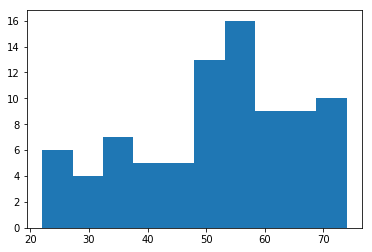

In [263]:
plt.hist(long['age_pq'])

In [264]:
#long['dob_time'] = pd.to_datetime(long['dob_pq'])

In [265]:
#plt.hist(long['primary_questionnaire_complete'])

In [266]:
long.primary_questionnaire_complete.unique()

array([nan,  0.,  2.])

In [267]:
import seaborn as sns

In [268]:
#del long['dob_time']

#long
long['primary_questionnaire_complete'].dropna(inplace=True)
long['primary_questionnaire_complete'].count()

762

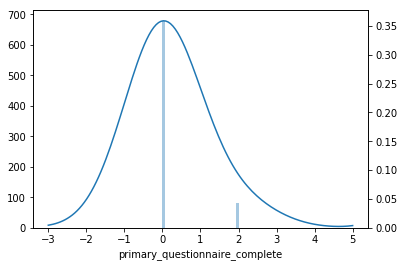

In [269]:
n = long['primary_questionnaire_complete']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.distplot(n, kde=False, ax=ax1)
sns.distplot(n, hist=False, ax=ax2, kde_kws={'bw':1})

In [270]:
long['sex_pq'].unique()

array([nan,  1.,  2.])

In [271]:
long.shape

(1102, 1592)

In [272]:
a = long['zipcode_birth'].unique()
print(a)

[nan '15213-4228' '16401' '43947' '16602' '16401-9717' '15417'
 '16148-3725' '08046' '15212' '16201' '15216' '26146' '15650' '19146'
 '08037' '15902-1663' '15323' '15001' '81004-2846' '15681' '16101-2407'
 '17111' '15022-3081' '26201-8880' '17325' '16117' '16037-7401' '15235'
 '16137-5622' '16501-0000' '15068-3217' '15227-3920' '90005' '15224-1334'
 '53022-5331' '15049-8950' '41102-5580' '17403-1942' '15108' '16125'
 '98006-2633' '64110-2962' '44646' '53140-3801' '15401-2332' '61875'
 '15317-1101' '15213-4514' '15237' '30312-3248' '15936' '16353' '15227'
 '15501' '29591' '16101-2818' '15017' '15219' '20901-1001' '15210' '16242'
 '15068-3408']


In [273]:
long[long['zipcode_birth'] == '15650']

,id_participant_l,redcap_event_name,redcap_survey_identifier,name_first,name_middle,name_last,dob,doe,id_primary,id_secondary,...,promis_pfc53_qposition,promis_pfc54,promis_pfc54_tscore,promis_pfc54_stderror,promis_pfc54_qposition,promis_pfc56,promis_pfc56_tscore,promis_pfc56_stderror,promis_pfc56_qposition,promis_bank_v12_physical_function_complete
985,PRT190876,year_01_arm_4,NaN,Jeanean,C,Smith,1966-03-04,2019-02-05,PRT190876,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,PRT190934,year_01_arm_4,NaN,Robert,NaN,Palmer,NaN,2019-03-17,PRT190934,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
long['zipcode_birth'].count()

66

In [275]:
long['city_now'].count()

84

In [276]:
len(long)

1102

In [277]:
len(long[long['sex_pq']==2])

27

In [278]:
#list(long)

In [279]:
long[long['id_participant_l']=='PRT180571']

,id_participant_l,redcap_event_name,redcap_survey_identifier,name_first,name_middle,name_last,dob,doe,id_primary,id_secondary,...,promis_pfc53_qposition,promis_pfc54,promis_pfc54_tscore,promis_pfc54_stderror,promis_pfc54_qposition,promis_pfc56,promis_pfc56_tscore,promis_pfc56_stderror,promis_pfc56_qposition,promis_bank_v12_physical_function_complete
766,PRT180571,year_01_arm_3,NaN,Martin,NaN,Ramaeckers,1963-01-14,2018-01-11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,PRT180571,year_02_arm_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
a = long[long['redcap_event_name'] == 'year_01_arm_2']
len(a)

502

In [281]:
a[a['promote_self_reported_outcomes_complete']==0]

,id_participant_l,redcap_event_name,redcap_survey_identifier,name_first,name_middle,name_last,dob,doe,id_primary,id_secondary,...,promis_pfc53_qposition,promis_pfc54,promis_pfc54_tscore,promis_pfc54_stderror,promis_pfc54_qposition,promis_pfc56,promis_pfc56_tscore,promis_pfc56_stderror,promis_pfc56_qposition,promis_bank_v12_physical_function_complete
1,PRT170001,year_01_arm_2,NaN,Amar,NaN,Shiwlochan,1993-01-14,2017-01-05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PRT170002,year_01_arm_2,NaN,Catherine,NaN,Liadis,1950-02-23,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRT170003,year_01_arm_2,NaN,Lisa,NaN,Stuczynski,1966-10-02,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,PRT170004,year_01_arm_2,NaN,Joe,NaN,Citro,1958-09-06,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PRT170005,year_01_arm_2,NaN,Harry,NaN,Rubenstein,1958-06-13,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PRT170006,year_01_arm_2,NaN,Richard,NaN,Paul,1968-03-05,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,PRT170007,year_01_arm_2,NaN,Julie,NaN,Higdon,1972-07-03,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PRT170009,year_01_arm_2,NaN,Christine,NaN,Dietz,1959-06-04,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,PRT170010,year_01_arm_2,NaN,Mary,NaN,Briguglio,1951-09-25,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,PRT170011,year_01_arm_2,NaN,Lizandra,NaN,Wyland,1984-11-10,2017-01-12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
long[long['id_participant_l'] == 'PRT190891']

,id_participant_l,redcap_event_name,redcap_survey_identifier,name_first,name_middle,name_last,dob,doe,id_primary,id_secondary,...,promis_pfc53_qposition,promis_pfc54,promis_pfc54_tscore,promis_pfc54_stderror,promis_pfc54_qposition,promis_pfc56,promis_pfc56_tscore,promis_pfc56_stderror,promis_pfc56_qposition,promis_bank_v12_physical_function_complete
1000,PRT190891,year_01_arm_4,NaN,Maria,NaN,Caligiuri,1988-08-21,2019-02-22,PRT190891,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
